# Comparing CDFs for different control strategies in 2D

### Specify example

In [1]:
name0 = '2D_CDF_Controlled'
name1 = '2D_EV_Controlled'
names = [name0, name1]

deadlines = [0.28, 0.33, 0.4]
mc_names = []
for deadline in deadlines:
    mc_names.append("deadline_" + str(deadline))
n_mc = len(mc_names)

### Import Packages


In [2]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt

## Set plotting defaults
mathtextsize = 20
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.rcParams['savefig.bbox'] = 'tight'

plt.rcParams['text.latex.preamble'] = r'''
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{bm}
'''

### Read in data from file

In [3]:
## Location of C++ output
outputfolders = [];
for name in names:
    outputfolders.append('../output/' + name)
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolders[0] + '_Gridsizes', 'i4')
nx = gridsize[0]
ny = gridsize[1]
ns = gridsize[2]
n_modes = gridsize[3]

## Step sizes
config = np.fromfile(outputfolders[0] + '_Stepsizes', fdtype)
dx = config[0]
dy = config[1]
ds = config[2]
xmin = config[3]
xmax = config[4]
ymin = config[5]
ymax = config[6]
smax = config[7]

X = np.linspace(xmin,xmax,nx)
Y = np.linspace(xmax,ymax,ny)
S = np.linspace(0,smax,ns)

## Get Monte Carlo Data
MC_CDF_list = []
for i in range(n_mc):
    MC_CDF_list.append(np.fromfile(outputfolders[0] + '_MC_pt_cdf' + mc_names[i], fdtype))
MC_CDF_EV = np.fromfile(outputfolders[1] + '_MC_pt_cdfEV', fdtype)
MC_avg  = np.fromfile(outputfolders[1] + '_MC_pt_avgEV', fdtype)

In [4]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex6'
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

# Plotting

## Compare CDFs for different strategies using Monte Carlo simulations

Starting location $(x,y,i) = (0.4,0.3,0)$

In [5]:
linespecs = ['b-','g-','r-','c','m','y','k']
linesizes = [2,2,2]
markers   = ['bo','go','ro','co','mo','yo','ko']

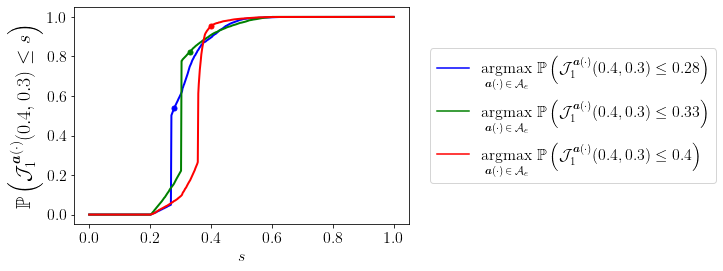

In [6]:
fig, ax = plt.subplots()

## Do some fake plotting outside axis limits to set legend marker size
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
for i in range(n_mc):
    ax.plot(2,0,linespecs[i],markersize=5,label=r'$\mathop{\mathrm{argmax}}\limits_{\bm{a}(\cdot) \, \in \, \mathcal{A}_e} \, \mathbb{P}\left(\mathcal{J}^{\bm{a}(\cdot)}_1(0.4,0.3) \le '+str(deadlines[i])+r'\right)$')

for i in range(n_mc):
    ax.plot(S,MC_CDF_list[i],linespecs[i],linewidth=linesizes[i])
ax.set_xlabel('$s$')
ax.set_ylabel(r'$\mathbb{P}\left(\mathcal{J}^{\bm{a}(\cdot)}_1(0.4,0.3) \le s\right)$', fontsize=mathtextsize)
ax.legend(loc='center left', bbox_to_anchor=(1.04,0.5))

## Add points for deadlines
for i in range(n_mc):
    s1 = int(np.round(deadlines[i] / ds))
    ax.plot(deadlines[i],MC_CDF_list[i][s1],markers[i],markersize=5)

plt.savefig(write_directory + '/' + name0 + '_CDFs.pdf')
plt.show()